In [55]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [56]:

train = pd.read_excel('Data_Train (1).xlsx')

test = pd.read_excel('Data_Test (1).xlsx')

In [57]:
train.shape, test.shape

((6019, 12), (1234, 11))

In [58]:
train.duplicated().sum(), test.duplicated().sum()

(0, 1)

In [59]:
df=train.copy()
train.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50


In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [61]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

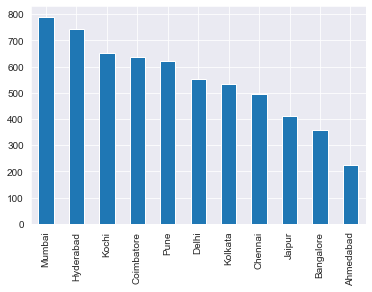

In [66]:
df.Location.value_counts().plot(kind='bar')
plt.show()

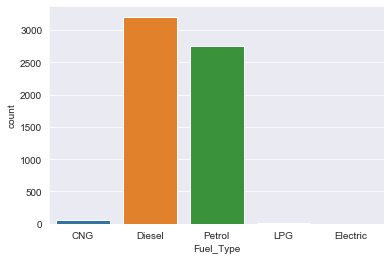

In [67]:
sns.countplot(x='Fuel_Type',data=df)

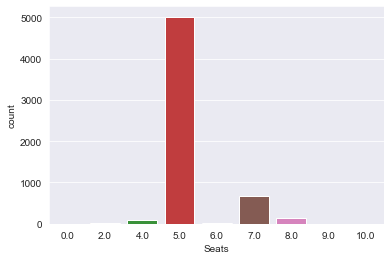

In [68]:
sns.countplot(x='Seats',data=df) 


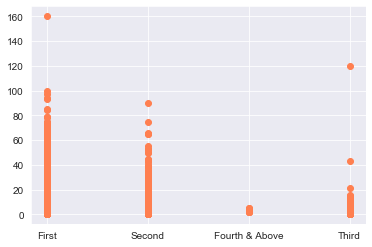

In [69]:
y=df['Price']
x=df['Owner_Type']
plt.scatter(x,y,c='coral')

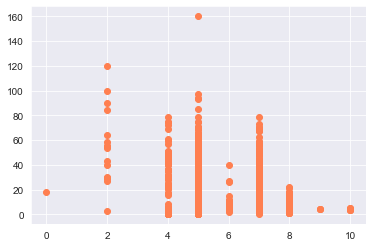

In [70]:
y=df['Price']
x=df['Seats']
plt.scatter(x,y,c='coral')

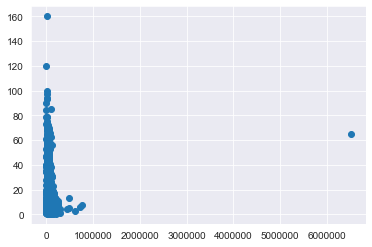

In [71]:
y=df['Price']
x=df['Kilometers_Driven']
plt.scatter(x,y)

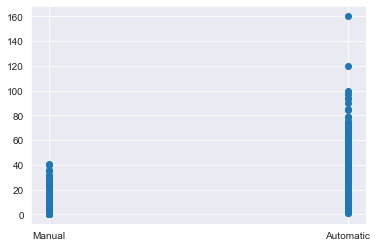

In [72]:
y=df['Price']
x=df['Transmission']
plt.scatter(x,y)

In [62]:
train.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

In [63]:
train = train[train['Kilometers_Driven'] < 700000]
train = train[train['Kilometers_Driven'] > 999]

In [64]:
train = train[train['Fuel_Type'] != 'Electric']
len(train)

6012

In [65]:
train = train[train['Name'] != 'Ambassador Classic Nova Diesel']
train = train[train['Name'] != 'Lamborghini Gallardo Coupe']
train = train[train['Name'] != 'Force One LX 4x4']
train = train[train['Name'] != 'Force One LX ABS 7 Seating']
train = train[train['Name'] != 'Smart Fortwo CDI AT']
len(train)

6006

In [12]:
df = train.append(test, ignore_index=True, sort=False)

In [13]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [14]:
df['Car_Age'] = 2019 - df['Year']

In [15]:
df['Mileage'] = df['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)

In [16]:
df['Engine'] = df['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)

In [17]:
df['Power'] = df['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)

In [18]:
df['Seats'] = df['Seats'].fillna(5)

In [48]:
df['Year'] = df['Year'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Owner_Type'] = df['Owner_Type'].astype('category')

In [21]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                  46
Seats                   0
Price                1234
Car_Age                 0
dtype: int64

In [49]:
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [22]:
df['Car_Brand1'] = df['Name'].apply(lambda x: ' '.join(x.split(' ')[:2]))

df['Engine'] = df.groupby(['Car_Brand1']).transform(lambda x: x.fillna(x.median()))['Engine']
df['Power'] = df.groupby(['Car_Brand1']).transform(lambda x: x.fillna(x.median()))['Power']


In [23]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
Car_Age                 0
Car_Brand1              0
dtype: int64

In [24]:
df['Car_Brand2'] = df['Name'].apply(lambda x: x.split(' ')[0])

In [25]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
Car_Age                 0
Car_Brand1              0
Car_Brand2              0
dtype: int64

In [26]:
def aggregate_functions(df):        
    
    agg_func = {
        'Location' : ['count'],
        'Mileage' : ['mean'],
        'Power' : ['mean'],
        'Engine' : ['mean'] }
    
    agg_df = df.groupby(['Car_Brand1']).agg(agg_func)
    agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
    agg_df.reset_index(inplace=True)
    
    agg_df = pd.merge(df, agg_df, on='Car_Brand1', how='left')
    
    return agg_df

In [27]:
df = aggregate_functions(df)

In [28]:
df.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Car_Brand1,Car_Brand2,Location_count,Mileage_mean,Power_mean,Engine_mean
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998.0,58.16,5.0,1.75,9,Maruti Wagon,Maruti,177,20.912373,66.201808,1014.056497


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf1 = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 1), max_df=1.0, min_df=2, binary=True)
df_name = tf1.fit_transform(df['Name'])
df_name = pd.DataFrame(data=df_name.toarray(), columns=tf1.get_feature_names())

df = pd.concat([df, df_name], axis=1)

In [30]:
df.drop(['Name','Car_Brand1','Car_Brand2'], axis=1, inplace=True)

In [31]:
train_df = df[df['Price'].isnull()!=True]
test_df = df[df['Price'].isnull()==True]
test_df.drop('Price', axis=1, inplace=True)

In [32]:
train_df.shape, test_df.shape

((6006, 669), (1234, 668))

In [33]:
train_df['Price'] = np.log1p(train_df['Price'])

In [34]:
X = train_df.drop(labels=['Price'], axis=1)
y = train_df['Price'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [35]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((4504, 668), (4504,), (1502, 668), (1502,))

In [36]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

In [37]:
!pip install lightgbm
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 1000,
         'num_leaves': 30,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65,
         }

lgbm = lgb.train(params=param,
                 verbose_eval=100,
                 early_stopping_rounds=50,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))

Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 0.16569
[200]	valid_0's rmse: 0.157282
[300]	valid_0's rmse: 0.154802
[400]	valid_0's rmse: 0.153914
[500]	valid_0's rmse: 0.153642
Early stopping, best iteration is:
[473]	valid_0's rmse: 0.15355
RMSLE: 0.15355043057216047


In [38]:
print('r2_score :',r2_score(y_cv,y_pred_lgbm))

r2_score : 0.9565925160610526


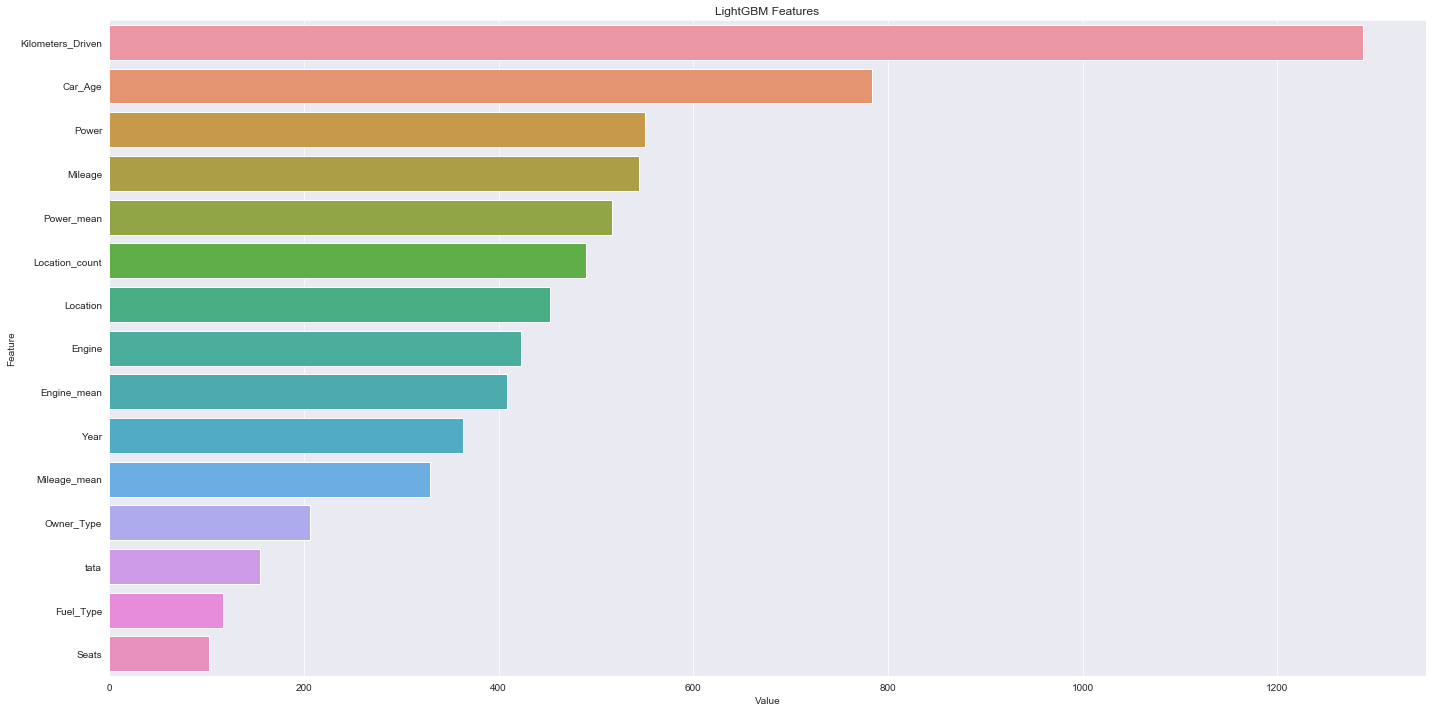

In [39]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:15], 
                           columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [40]:
Xtest = test_df

In [41]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=15, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 1000,
         'num_leaves': 30,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65
         }

    lgbm = LGBMRegressor(**param)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=50)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_lgbm))))

    errlgb.append(sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_lgbm))))
    p = lgbm.predict(Xtest)
    
    y_pred_totlgb.append(p)

RMSLE LGBM:  0.13252855925766685
RMSLE LGBM:  0.13740757927134034
RMSLE LGBM:  0.11479621051269341
RMSLE LGBM:  0.12235463364209691
RMSLE LGBM:  0.1182305206676763
RMSLE LGBM:  0.14422819970579226
RMSLE LGBM:  0.20282597537741134
RMSLE LGBM:  0.10797919694869093
RMSLE LGBM:  0.14004247516437918
RMSLE LGBM:  0.12547591307566758
RMSLE LGBM:  0.11062001721307581
RMSLE LGBM:  0.11377948268594748
RMSLE LGBM:  0.12518149001543025
RMSLE LGBM:  0.13310882392085094
RMSLE LGBM:  0.14851678039942182


In [42]:
np.mean(errlgb)

0.13180505719054275

In [43]:
lgbm_final = np.expm1(np.mean(y_pred_totlgb,0))

In [44]:
df_sub = pd.DataFrame(data=lgbm_final, columns=['Price'])
writer = pd.ExcelWriter('Output.xlsx', engine='xlsxwriter')
df_sub.to_excel(writer,sheet_name='Sheet1', index=False)
writer.save()

In [45]:
df_sub.shape

(1234, 1)

In [46]:
df_sub.head()

,Price
0,2.701549
1,2.972585
2,16.312669
3,3.871581
4,4.453351
